<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

In this lab, we delve into the fundamental concept of feature selection. We start by conducting correlation analysis to identify relevant features for our regression model. By examining the relationship between each feature and the target variable, we aim to pick the most influential features. Additionally, we explore the significance of cross validation in model evaluation and how it relates to feature selection. Through cross validation, we ensure that our model generalises well to unseen data by assessing its performance across multiple validation sets.

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
file_path = 'winequality_merged.csv'
try:
    file_df = pd.read_csv(file_path, encoding='UTF-8')
    print("DataFrame loaded successfully.")
    print(file_df.head(10))
except FileNotFoundError:
    print(f"File {file_path} not found.")
except pd.errors.ParserError as e:
    print(f"Error parsing the file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


DataFrame loaded successfully.
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0              

#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER
file_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [4]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
file_df.shape

(6497, 13)

In [6]:
corr_matrix = file_df.corr()

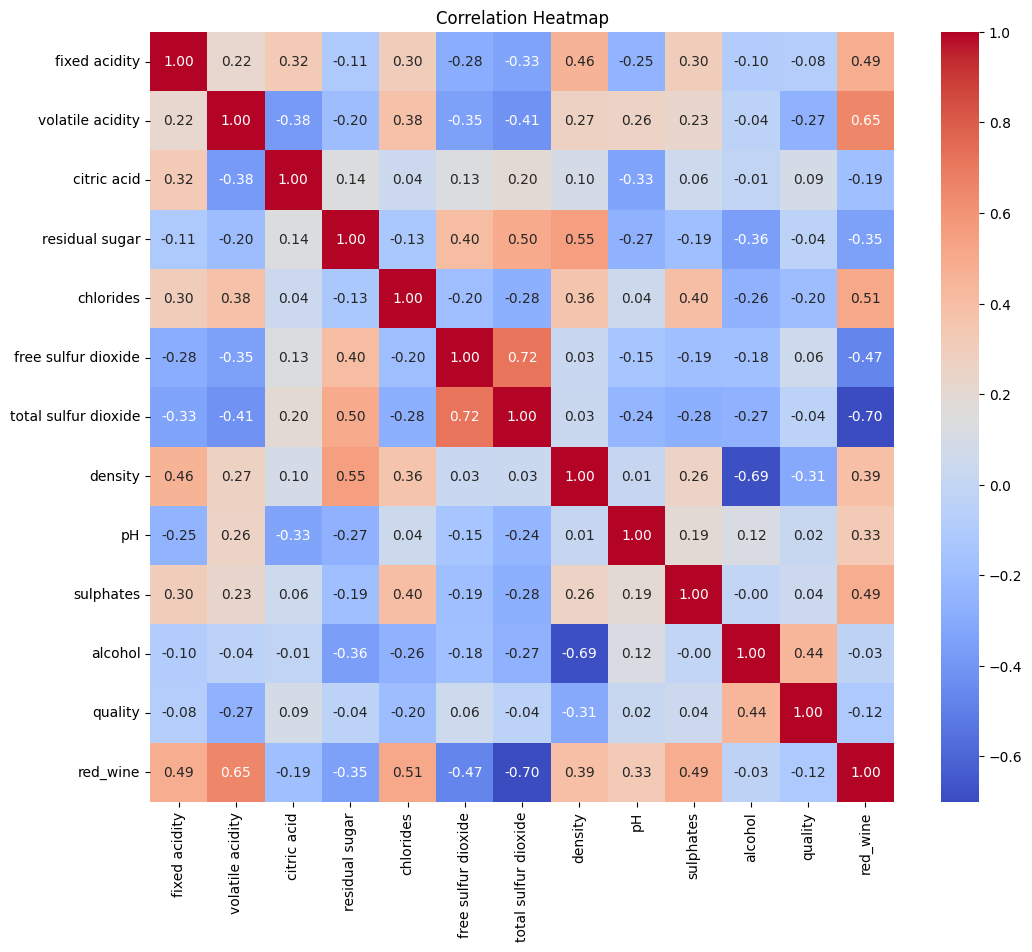

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

###Feature Selection
To choose the features for your model, consider the following:

Correlation with Target Variable: Features that are more strongly correlated with the target variable are generally more useful for prediction.

alcohol has the highest positive correlation with quality (0.44).
density and total sulfur dioxide have the highest negative correlations with quality (-0.31 and -0.30, respectively).

Multicollinearity: Features that are highly correlated with each other can cause issues in some models. It is often useful to remove one of a pair of highly correlated features.

free sulfur dioxide and total sulfur dioxide are highly correlated (0.72).
fixed acidity and density are also highly correlated (0.46).

Recommended Features
Based on the correlation matrix and the principles above, you might consider using the following features for your model:

alcohol: Strong positive correlation with quality.
volatile acidity: Moderate negative correlation with quality.
total sulfur dioxide: Moderate negative correlation with quality.
density: Moderate negative correlation with quality.
sulphates: Weak positive correlation with quality but could still provide some predictive power.

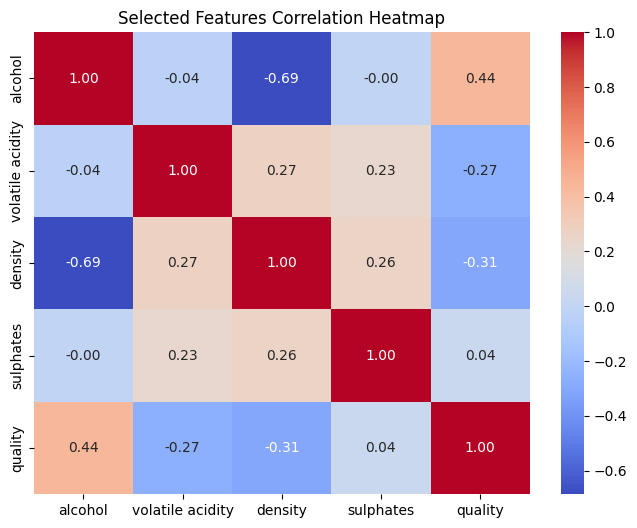

Target variable: quality
Selected features: ['alcohol', 'volatile acidity', 'density', 'sulphates']


In [8]:
target = 'quality'
# selected_features = ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'density', 'sulphates']    ## Expereminet 1
# selected_features = ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'density']   ## Experment 2, drop Sulphaets
selected_features = ['alcohol', 'volatile acidity','density', 'sulphates']  ## Experiment 3 , drop 'total sulfur dioxide'

# Calculate the correlation matrix for the selected features and the target variable
selected_corr_matrix = file_df[selected_features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Selected Features Correlation Heatmap')
plt.show()

# Print target variable and selected features
print(f"Target variable: {target}")
print(f"Selected features: {selected_features}")

### 2. Set Target Variable

Create a target variable for wine quality.

In [9]:
# Target Variable
# Looks like target Variable is Quality
Y = file_df[target]

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [10]:
# ANSWER
X = file_df[selected_features]

### 4. Using Linear Regression Create a Model and Test Score

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
# Train-Test Split

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [13]:
# Create a model for Linear Regression

# Fit the model with the Training data

# Calculate the score (R^2 for Regression) for Training Data

# Calculate the score (R^2 for Regression) for Testing Data

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)



LinearRegression()

In [14]:
# Evaluate thhe Model
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable for the test set
Y_pred = model.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.5510526427170308
R^2 Score: 0.2538689716957483


### above MSE and R Squared value doesn't suggest a good model

### How can we try to find more features and improve it
Improving the Model
To improve the model, you could consider the following steps:

Feature Engineering: Add more relevant features or transform existing features to capture non-linear relationships.
Model Selection: Try more sophisticated models such as decision trees, random forests, gradient boosting machines, or even neural networks.
Hyperparameter Tuning: Use techniques such as grid search or random search to find the best hyperparameters for your model.
Cross-Validation: Use cross-validation to ensure your model's performance is robust and not due to overfitting.

### Random Forest and Gridsearch
Random Forest model and performs a grid search to find the best hyperparameters. It then evaluates the performance of the best model on the test set. This might give you better results compared to a simple linear regression model.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid with fewer values
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("11")
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', n_jobs=-1)

print("12")
# Fit the model
random_search.fit(X_train, Y_train)

print("13")
# Get the best estimator
best_rf = random_search.best_estimator_

print("14")
# Predict the target variable for the test set
Y_pred = best_rf.predict(X_test)

print("15")
# Calculate and print the performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



11
12


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/s

13
14
15
Mean Squared Error: 0.43107070965047195
R^2 Score: 0.4163257610425579


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict the target variable for the test set
Y_pred = best_rf.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
139 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_

Mean Squared Error: 0.4170749601404078
R^2 Score: 0.43527615192054026


## BONUS: Cross validation

In [17]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [18]:
# Set up 5-fold cross validation
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Define the target variable and selected features
target = 'quality'
selected_features = ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'density', 'sulphates']

# Set X and Y
X = file_df[selected_features]
Y = file_df[target]


def cross_validation_scores(X, Y, k_folds=5):
    """
    Perform K-Fold cross-validation and return a DataFrame of train and test scores.

    Parameters:
    X (pd.DataFrame): Features.
    Y (pd.Series): Target variable.
    k_folds (int): Number of folds for K-Fold cross-validation.

    Returns:
    pd.DataFrame: DataFrame containing the train and test scores for each fold.
    """
    # Set up K-Fold cross-validation
    k_fold = KFold(k_folds, shuffle=True, random_state=42)
    train_scores = []
    train_rmse = []
    test_scores = []
    test_rmse = []

    # Perform cross-validation
    for k, (train_idx, test_idx) in enumerate(k_fold.split(X)):
        # Get training and test sets for X and y
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

        # Create and fit the Random Forest model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, Y_train)

        # Make predictions on training and test sets
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)

        # Calculate R2 and RMSE for training set
        train_r2 = r2_score(Y_train, Y_train_pred)
        train_rmse_val = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
        train_scores.append(train_r2)
        train_rmse.append(train_rmse_val)

        # Calculate R2 and RMSE for test set
        test_r2 = r2_score(Y_test, Y_test_pred)
        test_rmse_val = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
        test_scores.append(test_r2)
        test_rmse.append(test_rmse_val)

    # Create a DataFrame to display the metrics
    metrics_df = pd.DataFrame({
        'Fold': range(1, k_folds + 1),
        'Train R2': train_scores,
        'Train RMSE': train_rmse,
        'Test R2': test_scores,
        'Test RMSE': test_rmse
    })

    return metrics_df



# Call the function
metrics_df = cross_validation_scores(X, Y, k_folds=5)
print(metrics_df)


   Fold  Train R2  Train RMSE   Test R2  Test RMSE
0     1  0.923227    0.242877  0.454764   0.634572
1     2  0.924135    0.240503  0.444919   0.650487
2     3  0.924923    0.238957  0.460569   0.644179
3     4  0.923712    0.240437  0.470009   0.643363
4     5  0.923965    0.240871  0.462189   0.639228


In [19]:
# Describe the metrics
metrics_df.describe()

,Fold,Train R2,Train RMSE,Test R2,Test RMSE
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,0.923993,0.240729,0.458490,0.642366
std,1.581139,0.000623,0.001407,0.009337,0.005933
min,1.000000,0.923227,0.238957,0.444919,0.634572
25%,2.000000,0.923712,0.240437,0.454764,0.639228
50%,3.000000,0.923965,0.240503,0.460569,0.643363
75%,4.000000,0.924135,0.240871,0.462189,0.644179
max,5.000000,0.924923,0.242877,0.470009,0.650487


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data?

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2024 Institute of Data


---



---





### Various results

target = 'quality'
selected_features = ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'density', 'sulphates']


Random sampling and evaluation [30 sec]
Mean Squared Error: 0.3949915229310797
R^2 Score: 0.46517735633586776

Original
Mean Squared Error: 0.5508759542550712
R^2 Score: 0.2541082097169316

Run all fit of Grid Search [ 1 min 30 sec]
Mean Squared Error: 0.39000978714624884
R^2 Score: 0.47192267857141446

target = 'quality'
selected_features = ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'density', 'sulphates']

Original
Mean Squared Error: 0.552061959833608
R^2 Score: 0.252502345787988

Random sampling and evaluation [30 sec]
Mean Squared Error: 0.42563963547285216
R^2 Score: 0.42367949215064915

Run all fit of Grid Search [ 1 min 30 sec]
Mean Squared Error: 0.42103447257834764
R^2 Score: 0.42991493076327136


target = 'quality'
selected_features = ['alcohol', 'volatile acidity','density', 'sulphates']  ## Experiment 3 , drop 'total sulfur dioxide'


Original
Mean Squared Error: 0.5510526427170308
R^2 Score: 0.2538689716957483

Random sampling and evaluation [30 sec]
Mean Squared Error: 0.41638937031698187
R^2 Score: 0.4362044476953787
Run all fit of Grid Search [ 1 min 30 sec]
Mean Squared Error: 0.4170749601404078
R^2 Score: 0.43527615192054026
